## Problem Statement
In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
Attribute Information:
Listing of attributes:
>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.



### Importing libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import precision_score,f1_score, recall_score,accuracy_score, confusion_matrix, classification_report
%matplotlib inline


### Reading dataset

In [109]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test ', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [60]:
train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Data Analysis by Visualization

#### 1. Sex vs Wage_class

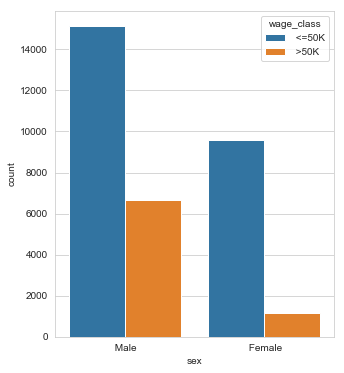

In [111]:
plt.figure(figsize=(5,6))
sns.set_style('whitegrid')
sns.countplot('sex',data=train_set,hue='wage_class')

#### Observation:

1. Males earn more than females in both ranges of wage_class

#### 2. workclass vs wage_class

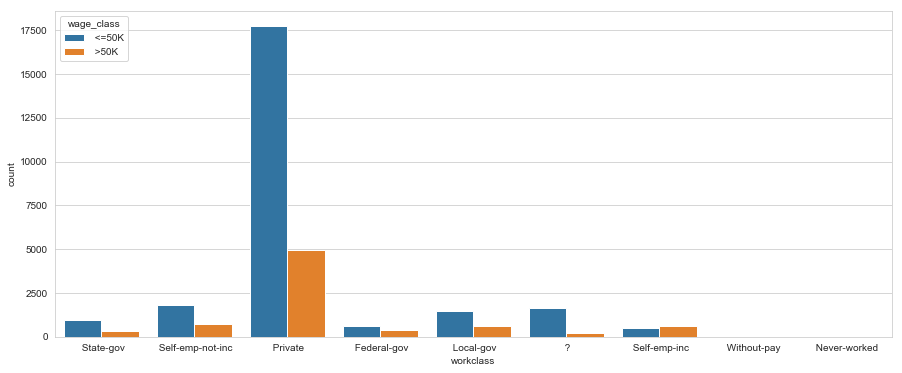

In [116]:
plt.figure(figsize=(15,6))
sns.countplot('workclass',data=train_set,hue='wage_class')

#### Observation:

1. Private workclass earns more than other workclasses.

#### 3. Education vs wage_class

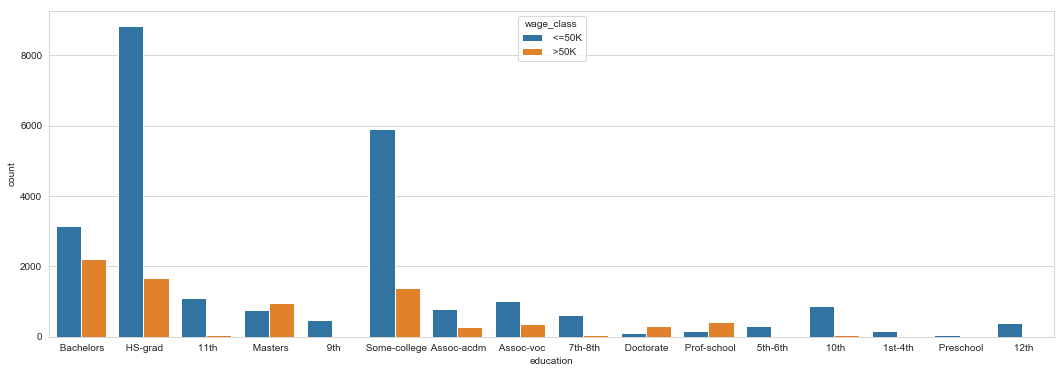

In [118]:
plt.figure(figsize=(18,6))
sns.countplot('education',data=train_set,hue='wage_class')

#### Observation:

1. In <= 50K, HS-grad , some-college and bachelors earn more.
2. In > 50K, Bachelors earn more compared to HS-grad and some-college.

#### 4. Marital status vs wage_class

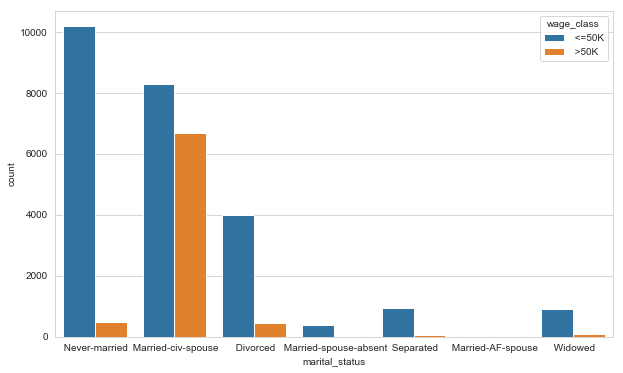

In [119]:
plt.figure(figsize=(10,6))
sns.countplot('marital_status',data=train_set,hue='wage_class')

#### Observation:

1. People who never married , married and divorced earn more in the range of <=50K.

2. People married with spouse, earn more in range >50K compared to other marital_status.

#### 5. Occupation vs wage_class

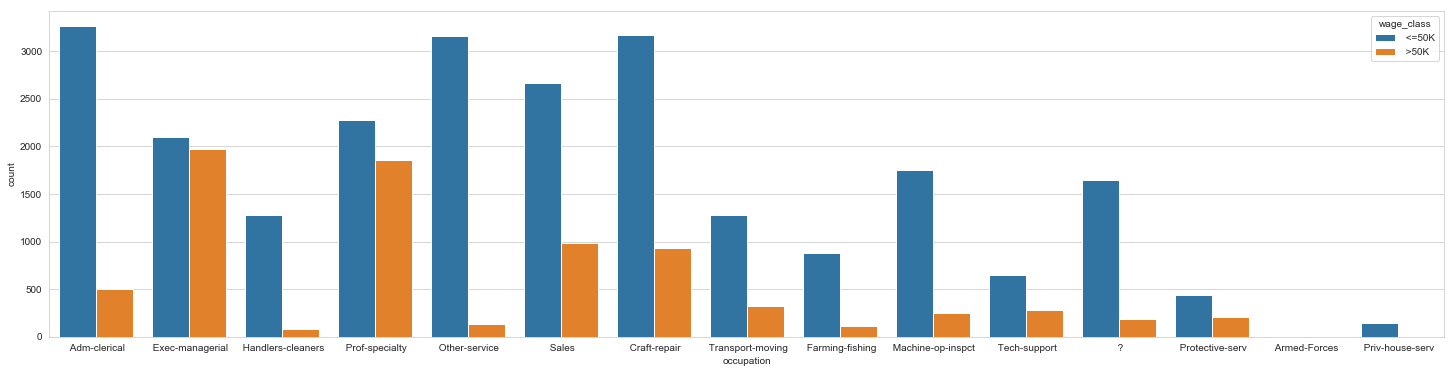

In [124]:
plt.figure(figsize=(25,6))
sns.countplot('occupation',data=train_set,hue='wage_class')

#### Observation:

1. More than 1000 people in most occupation earn in range <=50K.


#### 6. Relationship vs wage_class

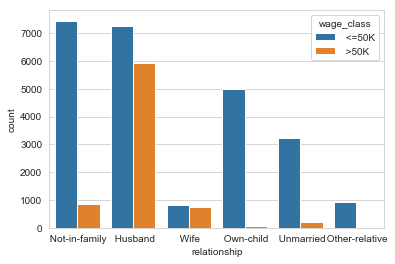

In [125]:
sns.countplot('relationship',data=train_set,hue='wage_class')

#### Observation:

1. Not-in-family and husbands earn  more in range <=50K.

2. Only husbands earn in range >50K compared to other relationship.

### Data Pre-processing:

#### 1. Identify missing values

In [8]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [9]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

#### Observation:
No missing values found

#### 2. Feature Encoding

In [13]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

#### Encoding for workclass:

In [126]:
label_quality = LabelEncoder()
train_set['workclass'] = label_quality.fit_transform(train_set['workclass'])
test_set['workclass'] = label_quality.fit_transform(test_set['workclass'])
print(train_set['workclass'].value_counts())
print(test_set['workclass'].value_counts())

4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: workclass, dtype: int64
4    11210
6     1321
2     1043
0      963
7      683
5      579
1      472
8        7
3        3
Name: workclass, dtype: int64


#### Encoding for education:

In [79]:
label_quality = LabelEncoder()
train_set['education'] = label_quality.fit_transform(train_set['education'])
test_set['education'] = label_quality.fit_transform(test_set['education'])
print(train_set['education'].value_counts())
print(test_set['education'].value_counts())

11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: education, dtype: int64
11    5283
15    3587
9     2670
12     934
8      679
1      637
7      534
0      456
5      309
14     258
6      242
2      224
10     181
4      176
3       79
13      32
Name: education, dtype: int64


#### Encoding for marital status:

In [80]:
label_quality = LabelEncoder()
train_set['marital_status'] = label_quality.fit_transform(train_set['marital_status'])
test_set['marital_status'] = label_quality.fit_transform(test_set['marital_status'])
print(train_set['marital_status'].value_counts())
print(test_set['marital_status'].value_counts())

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital_status, dtype: int64
2    7403
4    5434
0    2190
6     525
5     505
3     210
1      14
Name: marital_status, dtype: int64


#### Encoding for occupation:

In [81]:
label_quality = LabelEncoder()
train_set['occupation'] = label_quality.fit_transform(train_set['occupation'])
test_set['occupation'] = label_quality.fit_transform(test_set['occupation'])
print(train_set['occupation'].value_counts())
print(test_set['occupation'].value_counts())

10    4140
3     4099
4     4066
1     3770
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: occupation, dtype: int64
10    2032
4     2020
3     2013
12    1854
1     1841
8     1628
7     1020
0      966
14     758
6      702
13     518
5      496
11     334
9       93
2        6
Name: occupation, dtype: int64


#### Encoding for relationship:

In [82]:
label_quality = LabelEncoder()
train_set['relationship'] = label_quality.fit_transform(train_set['relationship'])
test_set['relationship'] = label_quality.fit_transform(test_set['relationship'])
print(train_set['relationship'].value_counts())
print(test_set['relationship'].value_counts())

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64
0    6523
1    4278
3    2513
4    1679
5     763
2     525
Name: relationship, dtype: int64


#### Encoding for race:

In [83]:
label_quality = LabelEncoder()
train_set['race'] = label_quality.fit_transform(train_set['race'])
test_set['race'] = label_quality.fit_transform(test_set['race'])
print(train_set['race'].value_counts())
print(test_set['race'].value_counts())

4    27816
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64
4    13946
2     1561
1      480
0      159
3      135
Name: race, dtype: int64


#### Encoding for sex:

In [84]:
label_quality = LabelEncoder()
train_set['sex'] = label_quality.fit_transform(train_set['sex'])
test_set['sex'] = label_quality.fit_transform(test_set['sex'])
print(train_set['sex'].value_counts())
print(test_set['sex'].value_counts())

1    21790
0    10771
Name: sex, dtype: int64
1    10860
0     5421
Name: sex, dtype: int64


#### Encoding for native_country:

In [85]:
label_quality = LabelEncoder()
train_set['native_country'] = label_quality.fit_transform(train_set['native_country'])
test_set['native_country'] = label_quality.fit_transform(test_set['native_country'])
print(train_set['native_country'].value_counts())
print(test_set['native_country'].value_counts())

39    29170
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
12       29
10       29
7        28
21       24
17       20
1        19
38       19
37       18
25       18
41       16
28       14
18       13
16       13
34       12
15        1
Name: native_country, dtype: int64
38    14662
25      308
0       274
29       97
32       70
11       69
2        61
18       51
8        49
3        47
5        43
9        37
34       35
6        33
21       32
14       31
23       30
31       30
30       27
4        26
22       25
13       24
12       20
39       19
7        17
19       16
28       15
26       15
35       14
20       13
36       12
16       10
10        9
33        9
27        9
1         9
37        8
40        7
15   

#### Encoding for wage_class:

In [86]:
label_quality = LabelEncoder()
train_set['wage_class'] = label_quality.fit_transform(train_set['wage_class'])
test_set['wage_class'] = label_quality.fit_transform(test_set['wage_class'])
print(train_set['wage_class'].value_counts())
print(test_set['wage_class'].value_counts())

0    24720
1     7841
Name: wage_class, dtype: int64
0    12435
1     3846
Name: wage_class, dtype: int64


In [87]:
train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [88]:
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [89]:
X_train = train_set.copy()
X_test = test_set.copy()

#### Feature splitting

In [90]:
x_train = X_train.drop('wage_class',axis=1)
y_train = X_train['wage_class']

x_test = X_test.drop('wage_class',axis=1)
y_test = X_test['wage_class']

In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32561, 14)
(32561,)
(16281, 14)
(16281,)


### XGBoost Classifier

#### Parameters initialisation

In [92]:
from xgboost.sklearn import XGBClassifier
#set the parameters for the xgbosst model
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}

In [93]:
bst = XGBClassifier(**params).fit(x_train, y_train)

#### Prediction for test data

In [94]:
preds = bst.predict(x_test)
preds

C:\Users\Lenovo-Pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Performance Measure`

#### 1. Accuracy

In [95]:
correct = 0

for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(y_test, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-acc))
print('Accuracy:%f'%acc)

Predicted correctly: 13838/16281
Error: 0.1501
Accuracy:0.849948


#### 2. Classification Report

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     12435
          1       0.72      0.60      0.65      3846

avg / total       0.84      0.85      0.84     16281



#### 3. Confusion Matrix

In [97]:
print(confusion_matrix(y_test, preds))

[[11544   891]
 [ 1552  2294]]


### Conclusion:

1. The dataset was modelled using XGBoost Classifier.

2. Accuracy was found to be 85%.

3. Precision was found to be 72%.

4. Recall was found to be 60%.

5. f1-score was found to be 65%.